## Before you read:
The formatting on some components of this tutorial are broken when viewed on Github, and one chart is missing. To see the correctly formatted version, view the HTML file in this repository by following this link:

http://htmlpreview.github.io/?https://github.com/BoldDog/ml_training_worked_example/blob/master/ML%20Training%20Notebook.html

# Foreword
The purpose of this tutorial is to provide an overview of how a machine learning problem is approached and solved, from start to finish, for both stakeholders and data modellers. Stakeholders who read this tutorial will better understand how machine learning can help their business, how it is deployed, and how to interpret the results, which can lead to improved business acumen and ML project leadership skills. Those new to machine learning who are interested in learning to deploy it will gain an understanding of how to think when approaching and executing the solution, as well as seeing practical examples of code and thought processes involved with a machine learning project.

If you are just interested in the theory and concepts, the code blocks can be safely ignored when reading.

<br>

**This tutorial will be helpful to you if you are interested in any or all of the answers to the following questions:**
<i>
- What does a machine learning project 'look like' from start to finish?
    - What are my employees doing when they're tackling a machine learning problem?
    - How can I help others or lead projects more effectively when machine learning is involved?
- What should I be thinking about when working on a machine learning problem?
    - How should I change my thinking as the project progresses?
    - How do I approach different common problems with machine learning applications? What are some things I should look out for?
- How can I best show my progress to clients or stakeholders?
- How do I assess the effectiveness of a machine learning solution?
    - How do I explain this to stakeholders or clients?
    - As a stakeholder, how do I understand how effective a machine learning solution is?
- If I wanted to get started right now, what code would I need to manipulate data and get a basic machine learning model up and running?
</i>

<br>

This is not a Python tutorial, so if you would like to follow along with the code itself then pre-knowledge of the basics of Python and Jupyter Notebooks is required.

# Technology and Data used

Note: As of 11/2018, this tutorial has not been updated to use the latest versions of Bokeh, Matplotlib, etc, and thus will likely have numerous errors if someone attempts to follow it on their own system. I'm leaving it up for anyone's interest, and may update it in the future.

- Python 3 (the language this tutorial is written in).
    - I strongly recommend using the <a href="https://www.anaconda.com/download/">Anaconda</a> distribution of python.
    - Jupyter notebook (included in Anaconda python distribution)\
        - This tutorial has been written 'inside' a Jupyter notebook, which is what allows the markdown text and in-line visuals of code, as well as allowing it to be exported as HTML (as displayed on this page).
    - Scikit-Learn library for the machine learning models and tools (included in Anaconda python distribution)
    - Bokeh library for pretty, interactive visualisations (included in Anaconda python distribution)
    - Pandas library for handling the data (included in Anaconda python distribution)
    - Pandas Profiling tool (can be found <a href="https://github.com/JosPolfliet/pandas-profiling">here</a>)
- Telecommunications practice data set
    - The original data set is <a href="www.iainpardoe.com/teaching/dsc433/data/Churn.xls">here</a> -- UPDATE: Link no longer works, see link below
    - I modified the original data set for the purposes of this tutorial, by converting it to CSV format and providing 3 additional derived columns, which can be downloaded <a href="https://www.dropbox.com/s/j4sb2ea3ahch7bd/telco_churn_example.csv?dl=0">here</a>, or from within this repository

# Problem Space

Our client, "Tele-x", wants to be able to predict churn before it happens so they can take steps to retain customers that are considering leaving. They have asked you to take a look at what small (but accurate) customer data they have to see if this is possible, and what other insights you might be able to gain. As an output, they would at least like to have a list of customers that are at risk of churning so they have actionable items to proceed with, and would appreciate any other information that can be found.

# General Approach

The general steps to any machine learning project are as follows:

0. **Business Understanding --** All projects begin by first understanding the business and its needs. Sometimes this step is fast, such as for long-term employees who already deeply understand their business niche. Other times this step takes time, such as when consulting for a client as a contractor, or when working with a section of a business that you've not encountered before. In all cases this step is critical to the rest of the project, as a clearly defined problem space and goal will act as a guiding light to all future tasks.
<br><br>
1. **Analysis --** We will start by first opening the data and taking a look at it. This is always the first step after establishing the basic business requirements, and is often interspersed with further research, data requests or other analyses. After assessing the data initially, the business problem is often further refined and a proper plan can be formed as to how to solve the problem.
<br><br>
2. **Preparation --** After analysing the data and thinking about how to best solve the problem, we'll begin to model the data into the form that we need it in for our predictions. This process always involves further analysis, and often problems and issues are found at this stage that were not apparent earlier. Modelling and manipulating the data is the only true way to fully understand a data set and its intricacies.
<br><br>
3. **Modelling --** Once our data has been transformed and prepared, we can begin modelling for predictions. Sometimes several models are made, and sometimes just one is made. In all cases, the model(s) should be assessed for accuracy, completeness and correctness. This is done iteratively. It is extremely rare for a model to be done right the first time.
<br><br>
4. **Refinement --** Steps 2 and 3 are repeated as necessary in order to refine the model(s). Often during step 3 there are new ideas about how to improve the model, new information comes to light that requires rework of the data, or discussion of results with stakeholders leads to clarification in the direction of the project. Sometimes models in step 3 need to be tweaked, and sometimes entirely different models need to be pursued after finding that the original models do not fit the problem correctly. A common mistake is to try too hard to fit a problem to a solution you have in mind. If something isn't working, it's often wise to try a different approach instead of bending the data into an unnatural shape. Try to fit the solution to the problem, not the other way around.
<br><br>
5. **Delivery --** Once an acceptable model has been created that solves the problem, it should be cleaned up and made presentable or useable. It should be tested for quality, and have its results clearly summarised for stakeholders so they understand what they are receiving, even if they don't understand the underlying data or methods. It is not acceptable to provide statistical predictions to a stakeholder without explaining the accuracy and significance of the results, as they often feed into important business decisions.

<br>

At all times during a project, communication with stakeholders is the most important task. Stakeholders should be made aware of any interesting developments or issues as they arise. It is extremely common for unexpected information to come to light as a result of sharing in-progress results with stakeholders, as they typically possess far more business-specific knowledge than the modeller and can provide sudden insight. Additionally, an informed stakeholder will understand the current progress and be able to plan ahead as a result of this, reducing stress for both parties.

For this tutorial we'll be starting at step 2. We'll be using a decision tree classifier, support vector machine and k-nearest neighbours algorithm to determine if a customer is likely to churn or not from a telecommunications company.

# Initialisation

In [1]:
# Pylab allows charts, tables, plotting, and other visual outputs to be output in-line in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


***Import libraries and modules used in the notebook***

In [2]:
from copy import deepcopy

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from bokeh.io import output_notebook, gridplot, show
import bokeh.charts as chart

import pandas as pd
import pandas_profiling as prof

output_notebook()  # Tells Bokeh that it is in a Notebook so it knows how to output its visuals

C:\Anaconda\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Loading BokehJS ...

# Loading the data

- We'll use pandas to load and manipulate the data. Pandas dataframes share many similarities with R dataframes.
- Pandas allows for easy, efficient manipulation of tabular data.
- Pandas is natively accepted by almost all major data libraries, including machine learning, plotting, and mathematics packages.

In [3]:
telData = pd.read_csv('telco_churn_example.csv')

telData.dtypes

Phone                    object
State                    object
Area Code                 int64
Int'l Plan                int64
VMail Plan                int64
Account Length            int64
VMail Message             int64
Day Mins                float64
Eve Mins                float64
Night Mins              float64
Intl Mins               float64
CustServ Est Mins       float64
CustServ Actual Mins    float64
CustServ Calls          float64
Day Calls                 int64
Day Charge              float64
Eve Calls                 int64
Eve Charge              float64
Night Calls               int64
Night Charge            float64
Intl Calls                int64
Intl Charge             float64
Total Charge            float64
Churn                     int64
dtype: object

# Profile it

In [4]:
prof.ProfileReport(telData)

Number of variables,24
Number of observations,3333
Total Missing (%),2.2%
Total size in memory,625.0 KiB
Average record size in memory,192.0 B
Numeric,17
Categorical,1
Date,0
Text (Unique),1
Rejected,5
Distinct count,212


### Key considerations

- Phone is indeed the unique identifier, so we won't use that in the model.
- Customer service information is partially missing. There are nulls across all three related columns. We should examine this more closely to determine what to do.
- As expected, the charges for each time of day correlate exactly with the number of minutes each call had, indicating that costs are fixed for everyone. One of these should be removed to prevent undesired overfitting on those variables. We'll remove charge, as we can factor in a total cost later.
- After further checking from the correlation noted above, the VMail Message column is almost always 0 if the VMail Plan column is 0. Thus, we can use VMail Message a proxy for it, as it contains the same (and more) information.
- Only 1/5th of customers have not had to call customer service before.
- State has a high cardinality. Below we will look at why, and what we might be able to do about it.
    - First, can we perhaps collapse the least-occurring entries into an 'other' category?
    - Additionally, as it is a categorical variable, we must consider how to convert it to a number for the model.

In [5]:
stateFrequency = telData['State'].value_counts(normalize=False)
stateFrequency

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
VA     77
WY     77
CT     74
VT     73
MI     73
ID     73
TX     72
UT     72
IN     71
KS     70
MD     70
NJ     68
NC     68
MT     68
WA     66
CO     66
NV     66
MA     65
MS     65
RI     65
AZ     64
FL     63
MO     63
ME     62
NM     62
ND     62
DE     61
NE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

### Results

The least-occurring states still have too many entries to consider collapsing them, as collapsing even the bottom 3 will eclipse the number in the highest occurring state.

### Grouping

If we were to group them, consider the following example methods:
- Geographic adjacency
    - Difficult to determine
- Socio-economic average
- Population
- Proximity to company headquarters
- Frequency of occurrence in data set

It's difficult to say which would be most effective in this instance (though some are obviously not useful). We may come back to some of these later, depending on how we go.

### Enumerating

Enumerating a variable is the process of turning it from a string to a number. This must typically be done for machine learning algorithms, as they usually only take numerical input.
There are different methods to do this and they cause different results in the machine learning algorithm. Below are some examples that might be used on this data set (we will not do all of them).

- Direct enumeration
    - This is simply converting the states to numbers, in some order.
        - The most simplistic order is alphabetical, but this is usually poor.
        - Could enumerate by order of population size, socio-economic average.
        - If there is a logical 'order' to the categorical variable, try to use that when enumerating.
- Binarisation
    - This involves the conversion of the variable into multiple variables representing binary states for each category.
    - In this instance, this would produce 52 binary columns (one for each US state).
    - Whilst typically safe, binarisation should not be done when a valid, logical enumeration can be performed as such enumeration will often provide better results, or at least be easier to deal with.
- Frequency enumeration
    - This is replacing the categories with the number of times they occur in the data set.
    - Most helpful when the population of a variable is relevant to the problem space.
- Enumeration by avg. churn
    - Replaces the state with the average of the churn for that state.
    - Sometimes wise to include a standard deviation with this.

# Plotting and Exploration

***Hypothesis: the number of customer service calls a customer has had is indicative of churn likelihood.***

***Let's check this out by plotting the proportion of churn for each number of customer service calls.***

In [6]:
churnBar = chart.Bar(telData[telData['CustServ Calls'].notnull()][['CustServ Calls', 'Churn']].\
                     groupby(['CustServ Calls']).mean().reset_index(),
                     values='Churn', label='CustServ Calls', legend=False,
                     ylabel='Churn Proportion', xlabel='Customer Service Calls')
chart.show(churnBar)

- There's a clear correlation between churn and customer service calls, proportionally.
- There's a noticeable dip between 3 and 4, indicating that any more than 3 phone calls to customer service has a high impact on customer satisfaction.

***Moving on to more general exploration, we can start by plotting the time-of-day minutes of each person against the charges incurred.***

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


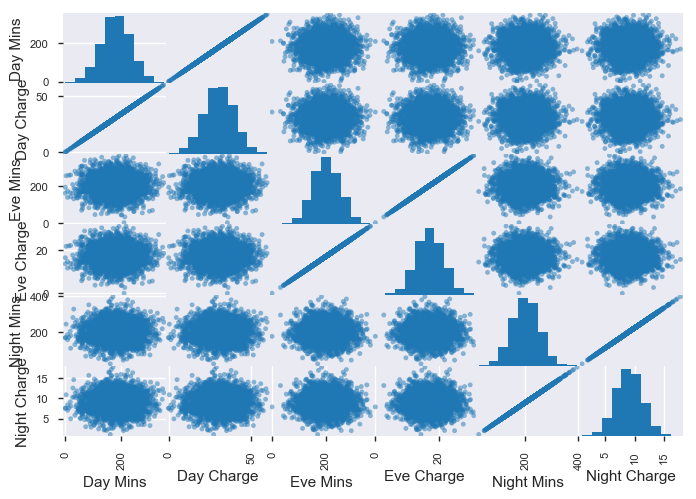

In [7]:
pd.tools.plotting.scatter_matrix(telData[['Day Mins', 'Day Charge', 'Eve Mins', 'Eve Charge', 'Night Mins', 'Night Charge']])

pyplot.show()

- This re-affirms that we should not put the charge and minutes variables into the model with each other.
- There seems to be no correlation whatsoever between minutes of each time of day.

***Let's see if we can find any correlations with time and cost:***

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


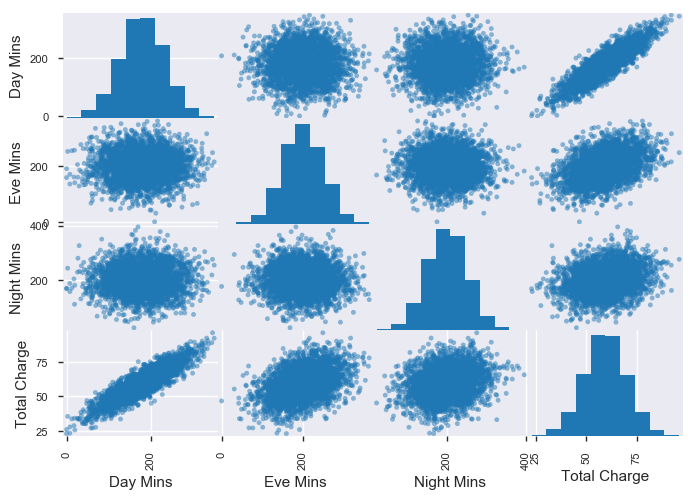

In [8]:
pd.tools.plotting.scatter_matrix(telData[['Day Mins', 'Eve Mins', 'Night Mins', 'Total Charge']])

pyplot.show()

***Day charge seems to correlate extremely heavily with the total charge. Noting that the correlations between minutes of the various times of day are non-existent, the explanation is likely that the day charge is substantially higher than the evening and night charges. This turns out to be true.***

***Let's take a closer look at the day charge vs total cost, and see if we can spot a pattern with the churn of customers. We will do this by plotting each time of day against total cost, and highlighting the churning customers.***

In [9]:
#Set up the height and width for a grid plot to fit the screen
w, h = 400, 400

#Add a new total mins column
telData['Total Mins'] = telData['Day Mins'] + telData['Night Mins'] + telData['Eve Mins']

#Generate a series of plots for simultaneous display
minsPlots = []
for column in ['Day Mins', 'Eve Mins', 'Night Mins', 'Total Mins']:
    minsPlots.append(chart.Scatter(telData[[column, 'Total Charge', 'Churn']],
                                   x='Total Charge', y=column, color='Churn',
                                  width=w, height=h))

minsGrid = gridplot([[minsPlots[0], minsPlots[1]],
                    [minsPlots[2], minsPlots[3]]])

show(minsGrid)

C:\Anaconda\lib\site-packages\bokeh\core\json_encoder.py:73: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  if pd and isinstance(obj, pd.tslib.Timestamp):


- There's an obvious area of high density where customers with minutes and high total charge have more churn.
- There isn't a noticeable difference between the total and the day charge itself.
- Day charge seems to contribute the most to the overall cost, and given the lack of differences between it and the total charge, it's a greater potential driver of churn.

***It might be worth seeing if the number of customer service calls is related to charge incurred during daytime calls.***

In [10]:
dayCostCustServScatter = chart.Scatter(telData[['Day Mins', 'Total Charge', 'CustServ Calls']],
                               x='Total Charge', y='Day Mins', color='CustServ Calls')
chart.show(dayCostCustServScatter)

***Nothing obvious, seems they're mostly unrelated.***

***Now we know that day minutes and customer service calls are correlated with the churn of customers, let's plot them against each other.***

In [11]:
dayCostCustServScatter = chart.Scatter(telData[['Day Mins', 'Churn', 'CustServ Calls']],
                               x='CustServ Calls', y='Day Mins', color='Churn')
chart.show(dayCostCustServScatter)

***We can clearly see the effects of both; where there is a high number of customer service calls or day minutes, there is an increase in churn, but not at the same time for some reason.***

### Let's assess our missing values now
By their column names, we can see that they're heavily related to each other.

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


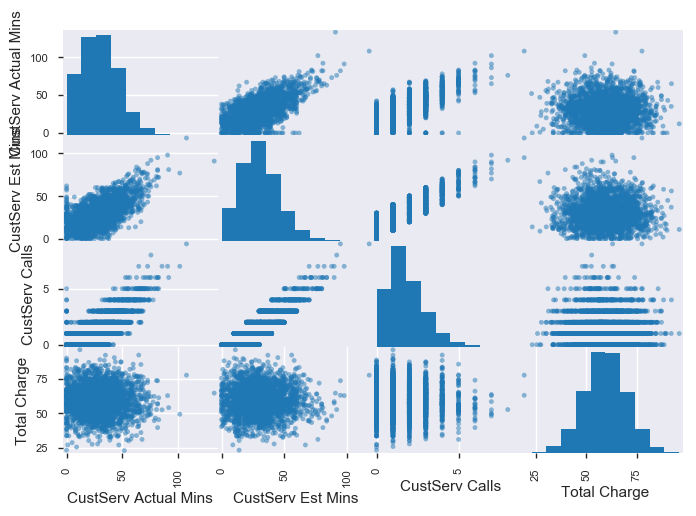

In [12]:
pd.tools.plotting.scatter_matrix(telData[['CustServ Actual Mins', 'CustServ Est Mins', 'CustServ Calls', 'Total Charge']])

pyplot.show()

- Both of the customer service time variables correlate heavily with the number of customer service calls.
- The estimated time has less variance at each call count than the actual call time. This indicates that the estimation technique has an upper and lower bound based on the number of calls made, which causes it to be a better indicator of the number of calls.

***What's the lowest value they can take?***

In [13]:
print(min(telData['CustServ Est Mins']))
print(min(telData['CustServ Actual Mins']))
print(min(telData['CustServ Calls']))

0.0
0.0
0.0


***How many rows have all three data points missing?***

In [14]:
len(telData[telData['CustServ Est Mins'].isnull() & telData['CustServ Actual Mins'].isnull() & telData['CustServ Calls'].isnull()])

16

- None of the customer service values go below zero.
- There are only 16 entries where all three of the variables are null.
- The three variables correlate, but not enough to warrant their removal.
- The correlations and almost complete cover mean that the missing values can be automatically imputed (in a sense) by the machine learning algorithm, provided an appropriate null value is selected.
- We will replace all nulls with -1 in order to differentiate them from the rest of the possible values and ensure that they do not interfere with the algorithm.

# Pre-modelling decisions

- We will use 10-fold cross validation to get an estimate for the accuracy of the models.
    - This means our dataset will split into 10 parts, train on 9 and test on 1, repeating for all combinations of training. The number of models this produces is 10C9 or 10C1, which is 10.
- We'll train using an 70:30 split of training vs validation data.
    - When using cross validation, an 80:20 split is still acceptable.
- We want to score by the accuracy of the classifier. This is the proportion of correct predictions vs incorrect predictions.
- We'll try out a decision tree, support vector machine and k-nearest neighbour classification.

In [15]:
seed = 2834234
validationSize = 0.3
folds = 10
scoringMethod= 'accuracy'

models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))

# Modelling

For the modelling component, we will take into consideration the results of our exploration:
- Remove the phone, charge, total mins and vmail plan columns
- Enumerate the state column by the average of the churn in each category
- Replace missing customer service values with -1

In [16]:
mData = deepcopy(telData)

# Enumerate the state column by average churn
#Get the average for each state
stateChurn = mData[['State', 'Churn']].groupby('State').mean().reset_index()
stateChurn.columns = ['State', 'State Churn']

mData = pd.merge(mData, stateChurn, how='left', on='State', sort=False)

#Remove the charge, vmail plan, state and total minutes columns
mData.drop(['Day Charge', 'Eve Charge', 'Night Charge', 'State', 'VMail Plan', 'Total Mins'], 1, inplace=True)
# We'll keep phone for the moment so we can identify customers later

#Replace all missing values with -1
mData.loc[mData['CustServ Calls'].isnull(), 'CustServ Calls'] = -1
mData.loc[mData['CustServ Est Mins'].isnull(), 'CustServ Est Mins'] = -1
mData.loc[mData['CustServ Actual Mins'].isnull(), 'CustServ Actual Mins'] = -1

mData.head()

,Phone,Area Code,Int'l Plan,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Est Mins,CustServ Actual Mins,CustServ Calls,Day Calls,Eve Calls,Night Calls,Intl Calls,Intl Charge,Total Charge,Churn,State Churn
0,382-4657,415,0,128,25,265.1,197.4,244.7,10.0,26.0,5.0,1.0,110,99,91,3,2.70,75.56,0,0.185714
1,371-7191,415,0,107,26,161.6,195.5,254.4,13.7,26.0,2.0,1.0,123,103,103,3,3.70,59.24,0,0.128205
2,358-1921,415,0,137,0,243.4,121.2,162.6,12.2,-1.0,26.0,0.0,114,110,104,5,3.29,62.29,0,0.264706
3,375-9999,408,1,84,0,299.4,61.9,196.9,6.6,40.0,50.0,2.0,71,88,89,7,1.78,66.80,0,0.128205
4,330-6626,415,1,75,0,166.7,148.3,186.9,10.1,54.0,36.0,3.0,113,122,121,3,2.73,52.09,0,0.147541


In [17]:
mVars = mData.drop('Churn', 1)
mResult = mData['Churn']
mVarsTrain, mVarsValidation, mResultTrain, mResultValidation = model_selection.train_test_split(mVars,
                                                                                                mResult,
                                                                                                test_size = validationSize,
                                                                                                random_state = seed)

#Remove the phone column, and keep a reference of it from the validation set
validationCustomerPhones = pd.DataFrame(mVarsValidation['Phone'])
for frame in [mVarsTrain, mVarsValidation]:
    frame.drop(['Phone'], 1, inplace=True)

instanceCount = len(mVarsTrain)

results = []
names = []

print('Results of models:')
#Loop over the models, pulling out the mean and standard deviation of the cross validation results
for name, model in models:
    kfold = model_selection.KFold(shuffle=True, n_splits=folds, random_state=seed)
    crossValResults = model_selection.cross_val_score(model, mVarsTrain, mResultTrain, cv=kfold, scoring=scoringMethod)
    results.append(crossValResults.mean())
    names.append(name)
    print('%s: %f (%f)' % (name, crossValResults.mean(), crossValResults.std()))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Results of models:
DT: 0.944268 (0.016744)
SVM: 0.849982 (0.030291)
KNN: 0.882976 (0.026048)


***Not bad, especially the decision tree classifier. However, 94% accuracy is a suspiciously high score, and we will want to confirm that we haven't overfit our model on the available data.***

# Validate Model

***With a clear winner out of the group of 3 models attempted, we will now validate the best model using a more robust methodology. For this, we will use the 30% of the data set that we reserved for validation.***

In [18]:
dtree = DecisionTreeClassifier()
dtree.fit(mVarsTrain, mResultTrain)
predictions = dtree.predict(mVarsValidation)

for func in [accuracy_score, confusion_matrix, classification_report]:
    print('\n')
    print(func(mResultValidation, predictions))



0.953


[[841  26]
 [ 21 112]]


             precision    recall  f1-score   support

          0       0.98      0.97      0.97       867
          1       0.81      0.84      0.83       133

avg / total       0.95      0.95      0.95      1000



***Accuracy Score***

- Describes how accurate the overall classification was, in simple terms of correct vs incorrect.

***Confusion Matrix***

- Describes the categorisation of the objects vs the ground truth of those objects.
- It is a matrix with columns and rows representing the outcomes of 0 and 1.
- The rows represent, in sum, the number of actual objects in that category.
- The columns represent what the algorithm classified them as.
- In this instance, of the 841 + 26 = 867 'false' values, the algorithm identified 835 falses and 32 trues, whilst of the 112 + 21 = 133 true values, the algorithm identified 21 falses and 112 trues.

***Precision, Recall, f1-score, Support***

- Precision is closely related to accuracy. It the measurement of accuracy across the outcomes that the algorithm was *able* to identify. The details provide an indication similar to a proportion of type 1 and type 2 errors; false positives and false negatives.
- Recall gives an indication as to the completeness of the predictions. This means that a high recall indicates that the algorithm was able to identify most of the results, whether they were incorrect or not.
    - In this case, as the algorithm of course attempts to classify every single item, it is a measurementof how many the algorithm had a degree of confidence in (i.e. how many of the outcomes did it identify that were not a guess).
    - Another example might be an algorithm that needs to identify squares and circles on a page. If there are 3 circles and 3 squares, and the algorithm identifies 5 'objects', then the recall value is 5/6. If the algorithm suggests that there are 4 circles and 1 square, then its accuracy in this case might be 4/5 (depending on what it identified as being a circle or square).
- The f1-score can be thought of as a weighted average of the precision and recall of the model.
- Support is simply the number of ground-truth items in each output category.

# Result

- Our decision tree classifer appears to be fairly robust with an exceptionally high accuracy.

- However, it currently possesses relatively high quantity of false-positives, compared to false-negatives.
    - A possible interpretation, given the problem space, is that many of these false-positives are customers that are at high risk of churn.
    - Thus, a recommendation might be that these customers which are identified by the algorithm should be considered at high risk of churn, and action should be taken to encourage their continuation with the company.
    - Further analysis should be done to further confirm any of these findings


***The model can now be exported and used to identify new customers of unknown expectation and identify if any are at risk. The model could also be run over the same customers in the future, with updated information, which may cause customers to shift into or out of the high risk category***

# Pretend export

***For the sake of completion in this tutorial, we'll now export the 30% validation set, pretending that it's an unknown set that we've run through the model which we can use to predict customers that will churn.***

In [19]:
validationCustomerPhones['Result'] = predictions
validationCustomerPhones.to_csv('customer_churn_predictions.csv', index=False)